Kendra Robbins

Comp Probset 3

# QR Decompostion

In [3]:
import numpy as np
from numpy import linalg as LA
import scipy
from scipy import linalg as la
from matplotlib import pyplot as plt
import pandas as pd
import sympy as sy
import math

# Problem 1


In [46]:
def mod_gs(A):
    
    m, n = A.shape
    Q = np.copy(A)
    R = np.zeros((n, n))
    
    for i in range(n):
        R[i, i] = la.norm(Q[:, i]) #ith column 
        Q[:, i] = Q[:, i] / R[i, i]
        for j in range(i + 1, n):
            R[i, j] = Q[:, j].T @ Q[:, i]
            Q[:, j] = Q[:, j] - R[i, j] * Q[:, i]
    
    return Q, R

# Problem 2

i think this will work after fixing 1?

In [41]:
def det(A): 
    
    Q, R = mod_gs(A)
    print(R)
    B = np.diag(R)
    abs_det_A = np.prod(B)
    return abs_det_A

In [42]:
A = np.array([[1,1],[1,0]])

In [47]:
mod_gs(A)

(array([[0, 1],
        [0, 0]]), array([[1.41421356, 0.        ],
        [0.        , 1.        ]]))

In [19]:
B = np.diag(A)

In [20]:
np.prod(B)

0

In [44]:
la.qr(A, mode="economic")

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]), array([[-1.41421356, -0.70710678],
        [ 0.        , -0.70710678]]))

In [48]:
la.qr?

In [51]:
C = np.array([[2,1],[1,2]])

In [22]:
D = np.diag(C)

In [23]:
print(D)

[2 2]


In [24]:
np.prod(D)

4

In [27]:
det(A)

[[1.41421356 0.        ]
 [0.         1.        ]]


1.4142135623730951

In [28]:
det(C)

[[2.23606798 0.        ]
 [0.         2.23606798]]


5.000000000000001

In [52]:
mod_gs(C)

(array([[0, 0],
        [0, 0]]), array([[2.23606798, 0.        ],
        [0.        , 2.23606798]]))

In [34]:
la.det(C)

3.0

# Problem 3

problem 1 was reduced QR decomp. should i write a function for full decomp? Problem 1 doesn't work so this isn't going to work. 

I don't understand the back substitution methods.

In [56]:
def prob3(A, b):

    Q, R = mod_gs(A)
    
    Q_T = Q.T
    
    y = Q_T * b
    
    x = y@la.inv(R)
    
    return x
    
    

Problem 4

In [61]:
def full_qr(A):
    
    m,n=np.shape(A)
    R=np.copy(A)
    
    sign = lambda x: 1 if x >= 0 else -1
    
    for k in range(0,n):
    
        u = np.copy(R[k:,k])
        u_0 = u[0]
        u_0= u_0 + sign(u_0)*la.norm(u)
        u = u / la.norm(u)
        R[k:,k:]=R[k:,k:]-2*np.outer(u,u.T@R[k:,k:])
        Q[k:,:]=Q[k:,:]-2*np.outer(u, u.T@Q[k:,:])
        
    return Q.T, R
    

Problem 5

In [62]:
def hes(A):
    
    m,n=np.shape(A)
    H = np.copy(A)
    Q=np.eye(m)
    
    sign = lambda x: 1 if x >= 0 else -1


    
    for k in range(0, n-2):
        
        u = np.copy(H[k+1:,k])
        u[0]=u[0]+sign(u[0])*la.norm(u)
        u = u / la.norm(u)
        H[k+1:,k:] = H[k+1:,k:] - 2* np.outer(u, u.T@H[k+1:,k:])
        H[:,k+1:] = H[:,k+1:] - 2*np.outer(H[:,k+1:]@u,u.T)
        Q[k+1:, :] = Q[k+1:, :] - 2 * np.outer(u, u.T @ Q[k+1:, :])
    
    return H, Q.T

# Least Squares and Eigenvalues 

Problem 1

In [7]:
def LS(A, b):
    
    Q_hat, R_hat = la.qr(A, mode="economic") #reduced QR factorization
    
    c = Q_hat.T @ b
    x_hat = la.solve_triangular(R_hat, c)
    
    return x_hat 
    
    

Problem 2

In [8]:
housing = np.load("housing.npy")
year = housing[:,0]
price = housing[:,1]

In [9]:
A = np.zeros((len(year), 2))

In [10]:
for i in range(len(year)):
    A[i,0] = year[i]
A[:,1]=1

In [11]:
LS(A, price)

array([  3.37476604, 164.08096257])

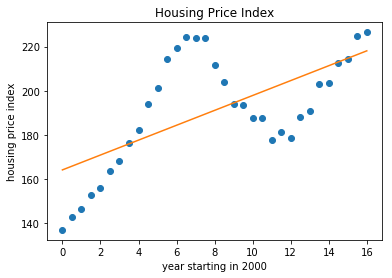

In [45]:
plt.plot(year, price, "o")
plt.xlabel("year starting in 2000")
plt.ylabel("housing price index")
plt.title("Housing Price Index")
plt.plot(year, LS(A,price)[1]+year*LS(A,price)[0])

plt.show()

# Problem 3

In [15]:
D = np.linspace(0,16,100)

def getvanderthings(n): #n is degree of desired polynomial
    
    A = np.vander(year,n+1)
    coeff = la.lstsq(A,price)[0]
    poly = np.poly1d(coeff)
    return poly


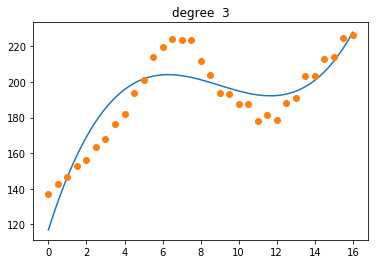

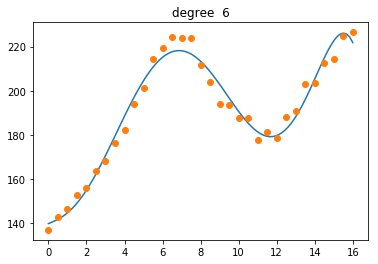

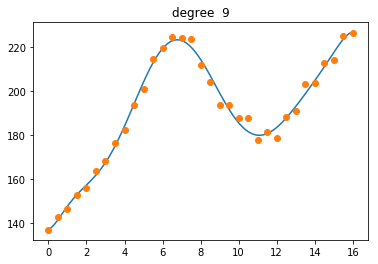

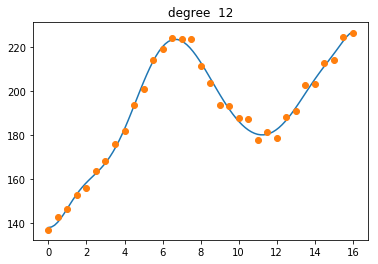

In [37]:
D = np.linspace(0,16,100)

f3 = getvanderthings(3)
Y3 =f3(D)
plt.plot(D, Y3)
plt.plot(year, price, "o")
plt.title("degree  3")
plt.show()


f6 = getvanderthings(6)
Y6 =f6(D)
plt.plot(D, Y6)
plt.plot(year, price, "o")
plt.title("degree  6")
plt.show()


f9 = getvanderthings(9)
Y9 =f9(D)
plt.plot(D, Y9)
plt.plot(year, price, "o")
plt.title("degree  9")
plt.show()

f12 = getvanderthings(12)
Y12 =f12(D)
plt.plot(D, Y12)
plt.plot(year, price, "o")
plt.title("degree  12")
plt.show()

# Problem 4

In [38]:
ellipse = np.load("ellipse.npy")
x = ellipse[:,0]
y = ellipse[:,1]

In [48]:
x2 = x**2
y2 = y**2
xy = x*y
ones = np.ones(len(x))
A = np.column_stack((x2,x,xy,y,y2))

In [49]:
a,b,c,d,e = la.lstsq(A,ones)[0]

In [51]:
def plot_ellipse(a,b,c,d,e):
    theta = np.linspace(0,2*np.pi, 200)
    cost, sint = np.cos(theta), np.sin(theta)
    A = a*(cost**2)+c*cost*sint+e(sint**2)
    B = b*cost+d*sint
    r = (-B + np.sqrt(B**2+4*A))/(2*A)
    plt.plot(r*cost, r*sint, lw=2)
    plt.gca().set_aspect("equal", "datalim")
    plt.show

In [57]:
theta = np.linspace(0,2*np.pi, 200)
cost = np.cos(theta)
sint = np.sin(theta)


<function matplotlib.pyplot.show(*args, **kw)>

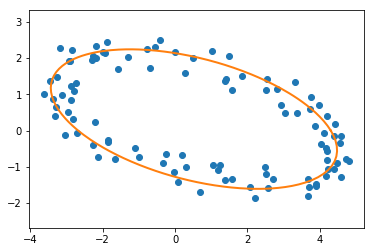

In [62]:
A = a*(cost**2) + c*cost*sint + e*(sint**2)
B = b*cost+d*sint
r = (-B + np.sqrt(B**2+4*A))/(2*A)
plt.plot(x,y, 'o')
plt.plot(r*cost, r*sint, lw=2)
plt.gca().set_aspect("equal", "datalim")
plt.show

Problem 5

In [152]:
def prob5(A, max_iter=100, tol=1e-20):
    
    m,n=np.shape(A)
    x0=np.random.random(n)
    x0=x0/la.norm(x0)
    
    its = 0
    diff = 10
    xprev = x0

    while diff > tol and its<max_iter: 
        xnew = A@xprev
        xnew = xnew/la.norm(xnew)
        diff = la.norm(xnew-xprev)
        its += 1
        xprev = xnew 
        
    if its<max_iter:
        print("Converged.")
    x = xnew
    
    #return np.outer(x.T, A@x), x
    return x.T@A@x, x      

In [153]:
A = np.random.random((10,10))
eigs, vecs = la.eig(A)
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]
np.allclose(A@x, lamb*x)
print(lamb)

(5.108758273717273+0j)


In [154]:
eigval = prob5(A)[0]
eigvec = prob5(A)[1]
np.allclose(eigval, lamb)
np.allclose(eigvec, x)

True

Problem 6

In [169]:
def prob6(A, its=100, tol =1e-20):
    
    m,n = np.shape(A)
    S = la.hessenberg(A)
    
    for k in range(its): 
        Q,R = la.qr(S)
        S=R@Q 
        
    eigs = []
    i=0
    
    while i<n:
        if (i<n-1 and abs(S[i+1,i]) < tol) or (i == n-1):
            eigs.append(S[i,i])
            
        else: 
            eigs.append(S[i, i] + 
                        S[i+1, i+1] + 
                        cmath.sqrt((S[i,i] + S[i+1, i+1])**2 - 
                                   4 * (S[i, i+1] * S[i+1, 1])))/2
            eigs.append(S[i, i] + 
                        S[i+1, i+1] - 
                        cmath.sqrt((S[i, i] + S[i+1, i+1])**2 - 
                                   4 * (S[i, i+1] * S[i + 1, 1])))/2
            i += 1
        i += 1
        
    return eigs
            

In [170]:
A = np.random.random((3,3))
B = A+A.T
prob6(B)

[2.465372395964932, 1.470274301451059, 0.4465041810523894]

In [177]:
eigs, vecs = la.eig(B)
np.allclose(prob6(B), eigs)

True

# SVD and Image Compression 

Problem 1

In [16]:
def comp_svd(A, tol=1e-2):
    A_H = np.conj(A).T
    λ, V = scipy.linalg.eig(A_H @ A)
    σ = np.sqrt(λ).real
    sort_id = np.argsort(σ)[::-1]
    σ = σ[sort_id]
    V = V[sort_id]
    r = (σ > tol).sum()
    σ_1 = σ[:r]
    V_1 = V[:, :r]
    U_1 = A @ V_1 / σ_1
    return U_1, σ_1, V_1.conj().T

In [18]:
A = ([[-2,3],[3,-2]])
B =([[3,4,6],[3,1,7],[8,9,2]])

In [26]:
comp_svd(B)

[0 2 1]
[2. 1.]
[2. 1.]


Problem 2

In [97]:
def prob2(A):
    
    R = np.linspace(0,2*np.pi, 200)
    x = np.cos(R)
    y = np.sin(R)
    S = np.vstack((x,y))
    E = np.array([[1,0,0],[0,0,1]])
    
    U, s, Vh = la.svd(A)
    D = np.zeros((len(s),len(s)))
    for i in range(len(s)):
        D[i,i] = s[i]
    
    plt.figure(figsize = (4,4))
    plt.plot(x,y)
    plt.plot(E[0],E[1])
    plt.show()
  
    plt.figure(figsize=(4,4))
    plt.plot((Vh@S)[0,:], (Vh@S)[1,:], 'b-')
    plt.plot((Vh@E)[0,:], (Vh@E)[1,:], 'r-')
    plt.axis("equal")


    plt.show()
    
    plt.figure(figsize = (4,4))
    plt.plot((D@Vh@S)[0,:], (D@Vh@S)[1,:], 'b-')
    plt.plot((D@Vh@E)[0,:], (D@Vh@E)[1,:], 'r-')
    plt.axis("equal")
    plt.show()
    
    plt.axis("equal")    
    plt.plot((U@D@Vh@S)[0,:], (U@D@Vh@S)[1,:], 'b-')
    plt.plot((U@D@Vh@E)[0,:], (U@D@Vh@E)[1,:], 'r-')     
    plt.show()
    
    
    
    
    
    

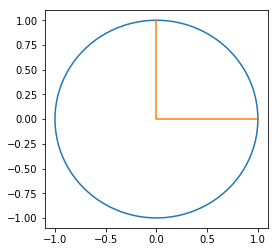

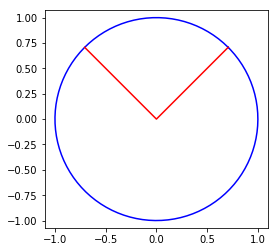

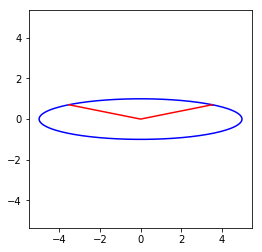

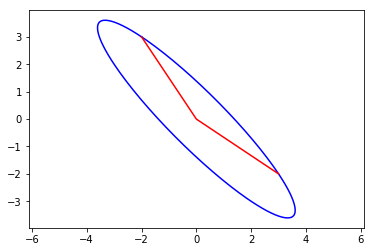

In [98]:
prob2(A)

Problem 3

In [62]:
R = np.linspace(0,2*np.pi, 200)
x = np.cos(R)
y = np.sin(R)
S = np.vstack((x,y))
E = np.array([[1,0,0],[0,0,1]])

In [ ]:
J = np.zeros(())

In [65]:
A

[[-2, 3], [3, -2]]

# Drazin

In [179]:
def drazin_test(A,k,A_D):
    
    drazin = True 
    
    B = A @A_D
    C = A_D@A
    if np.allclose(B,C) == False:
        drazin = False
    
    A_k1 = LA.matrix_power(A, k+1)
    A_k = LA.matrix_power(A, k)
    E = A_k1@A_D
    if np.allclose(E,A_k) == False: 
        drazin = False
        
    F = A_D@A@A_D
    if np.allclose(F, A_D) == False:
        drazin = False
        
    return drazin 
        

In [180]:
A = np.array([[1,3,0,0],[0,1,3,0],[0,0,1,3],[0,0,0,0]])
A_D = np.array([[1,-3,9,81],[0,1,-3,-18],[0,0,1,3],[0,0,0,0]])

In [181]:
drazin_test(A,1,A_D)

True

In [182]:
B = np.array([[1,1,3],[5,2,6],[-2,-1,-3]])
B_D = np.zeros((3,3))

In [183]:
drazin_test(B,3,B_D)

True

Problem 2

In [184]:
def drazin(A, tol):
    
    n = len(A)
    f = lambda x: abs(x) > tol
    g = lambda x: abs(x) <= tol
    Q1, S, k1 = la.schur(A, sort=f)
    Q2, T, k2 = la.schur(A, sort=g)
    U = np.hstack((S[:, :k1], T[:, :n - k1]))
    U_inv = la.inv(U)
    V = U_inv@A@U
    Z = np.zeros((n,n)) 
    if k1 != 0:
        M_inv = la.inv(V[:k1,:k1])
        Z[:k1,:k1] = M_inv
        
    drazin = U@Z@U_inv
    return drazin 
    
    

In [185]:
drazin(A,.001)

array([[  1.,  -3.,   9.,  81.],
       [  0.,   1.,  -3., -18.],
       [  0.,   0.,   1.,   3.],
       [  0.,   0.,   0.,   0.]])

In [186]:
drazin(B,.001)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Problem 3


In [189]:
def er(A): #A is an adjacency matrix
    
    m,n = np.shape(A)
    tol = 1e-5
    
    #calculate laplacian of A: 
    D = np.diag(np.sum(A + A * np.eye(n), axis = 1))
    L = D - A
    
    R = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            if not i == j:
                Ltilde = np.copy(L)
                Ltilde[j,:] = np.eye(n,n)[j,:]
                R[i,j] = drazin(Ltilde, tol)[i,i]
    
    for i in range(n): 
        R[i,i]=0
        
    return R 
    

# Problem 4 & 5

In [ ]:
class LinkPredictor: 
    
    
    def __init__(self, csv):
        
        

# Conditioning and Stability

In [211]:
def cond_num(A):
    
    σ = la.svd(A, compute_uv=False) #σ is the set of singular values of A
    σmax = np.max(σ)
    σmin= np.min(σ)
    k= σmax/σmin #condition number of A
    
    
    if k == 0:
        k=np.inf
    
    return k
    

In [200]:
A = np.array([[1,2],[2,1]])

In [207]:
B =la.svd(A, compute_uv=False)
B

array([3., 1.])

In [206]:
np.max(B)

2.9999999999999996

In [212]:
C = np.random.random((3,6))
cond_num(C)

5.03527791719992

In [216]:
LA.cond(C)

5.03527791719992

In [217]:
Q = la.qr(C)[0]
cond_num(Q)

1.0

Problem 2

In [ ]:
def wilk(n=101):
    
    #roots of the original wilk poly:
    w_roots = np.arange(1,21)

    # Get the exact Wilkinson polynomial coefficients using SymPy.
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_coeffs = np.array(w.all_coeffs())
    
    b = np.zeros(len(w_roots))
    
    #initialize vectors that will hold the absolute and relative condition numbers
    abs_cond_nums = np.zeros((n)) 
    rel_cond_nums = np.zeros((n))
    
    for j in range(n): 

        r = np.random.normal(loc = 0, scale =1e-11, size =(len(w_coeffs)))
        new_coeffs = w_coeffs + r
        
        new_roots=np.roots(np.poly1d(new_coeffs)) #roots of the polynomial with perturbed coefficients
        
        plt.plot(w_roots, b, 'o')
        plt.plot(new_roots.real, new_roots.imag,',')
        
        # Estimate the absolute condition number in the infinity norm.
        abs_cond_nums[j] = la.norm(new_roots - w_roots, np.inf) / la.norm(new_coeffs - w_coeffs, np.inf)
        # Estimate the relative condition number in the infinity norm.
        rel_cond_nums[j] = abs_cond_nums[j] * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
        
        
    av_abs_cn = np.average(abs_cond_nums)
    av_rel_cn = np.average(rel_cond_nums)
    plt.show()

    return av_abs_cn, av_rel_cn
     
        

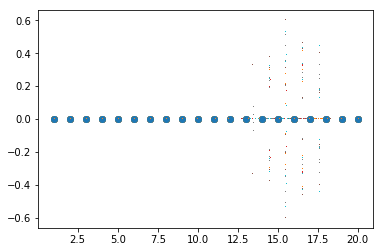

(2926077749999.868, 2.0195437140735866e+30)

In [127]:
wilk()

Problem 3

In [156]:
def prob3(A):
    
    reals = np.random.normal(0, 1e-10, np.shape(A))
    imags = np.random.normal(0, 1e-10, np.shape(A))
    H = reals + 1j*imags
    Atild = A+H
    
    eig_A = la.eig(A)[0]
    eig_Atild = la.eig(Atild)[0]
    
    abs_cn = la.norm(eig_A - eig_Atild,2) / la.norm(H,2)
    rel_cn = la.norm(A,2) * abs_cn / la.norm(eig_A,2)
    
    return abs_cn, rel_cn

Problem 4

In [188]:
def prob4(xmin, xmax, ymin, ymax, res):
    
    X = np.linspace(xmin,xmax,res)
    Y = np.linspace(ymin, ymax, res)
    
    rel_con_nums = np.zeros((res, res))
    
    for i in range(res):
        for j in range(res):
            A = np.array([[1, i],[j,1]])
            
            rel_con_nums[i,j] = prob3(A)[1]
    
    plt.pcolormesh(X, Y, rel_con_nums, cmap = 'gray_r')
    

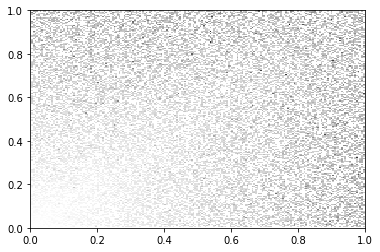

In [191]:
prob4(0,1,0,1,200)

Problem 5

In [193]:
xk, yk = np.load("stability_data.npy").T


In [240]:
def prob5(n):
    
    A = np.vander(xk,n+1)
    D = np.linspace(0,1,100)
    
    #first approach
    xhat1 = la.inv(A.T@A)@A.T@yk
    poly1=np.poly1d(xhat1)
    Y1 = poly1(D)
    
    #second approach
    Q,R = la.qr(A, mode="economic")
    c = Q.T@yk
    xhat2 = la.solve_triangular(R,c)
    poly2 = np.poly1d(xhat2)
    Y2 = poly2(D)
    
    error1 = la.norm(A@xhat1,2)
    error2 = la.norm(A@xhat2,2)
   
    plt.plot(D, Y1, label="Normal Eqns")
    plt.plot(D, Y2, label="QR")
    plt.plot(xk, yk, ",")
    plt.title("Degree: " + str(n))
    plt.legend()
    
    plt.show()
    
    return error1, error2
    
    

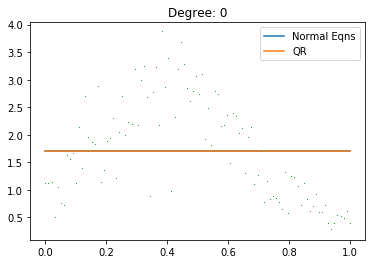

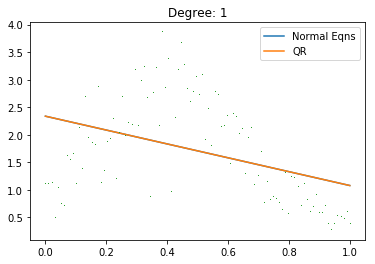

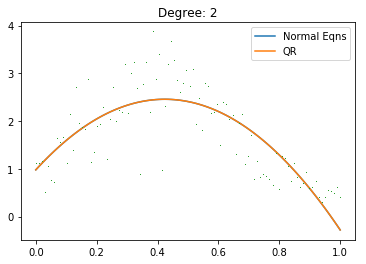

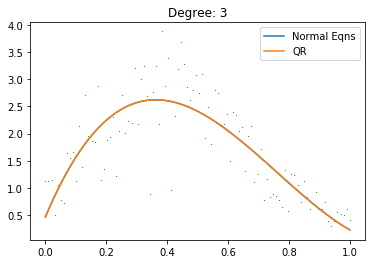

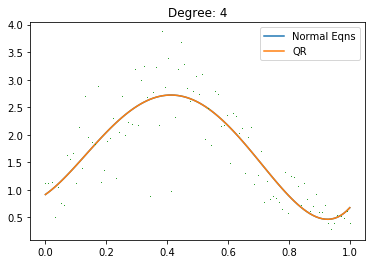

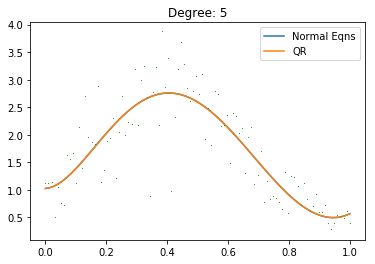

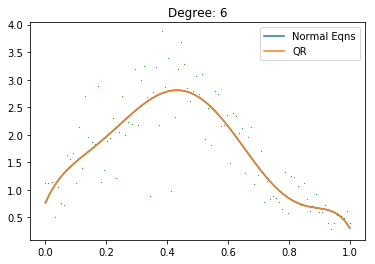

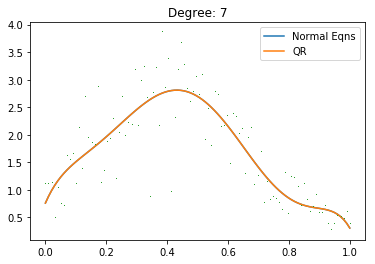

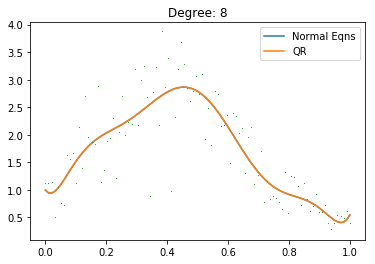

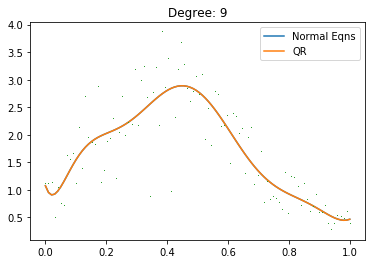

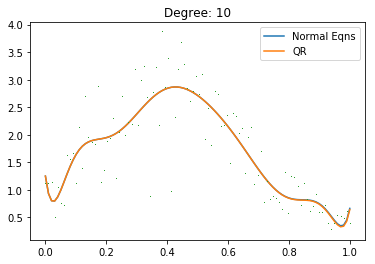

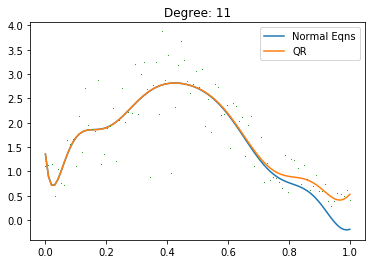

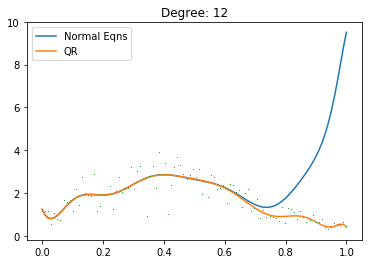

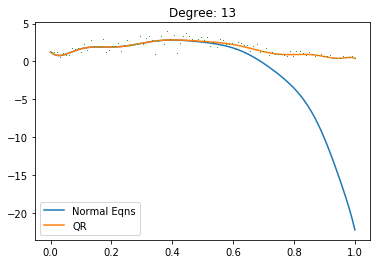

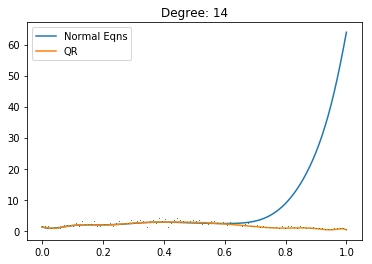

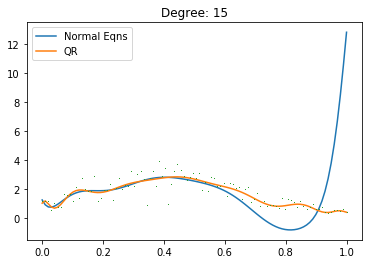

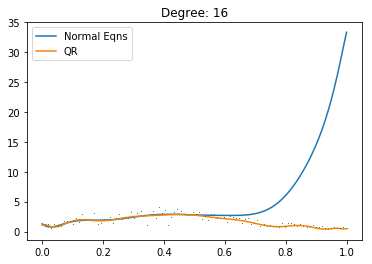

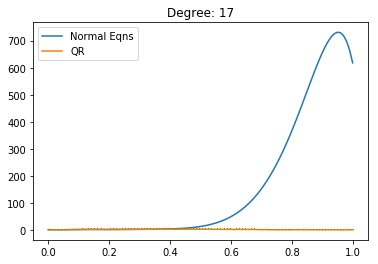

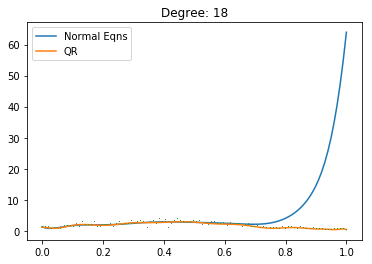

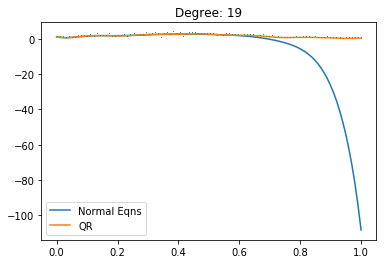

In [241]:
for i in range(20):
    prob5(i)

Problem 6

In [256]:
from sympy import poly_from_expr, product, symbols, integrate, exp, N, subfactorial, factorial


In [268]:
def error():
    
    
    ns = np.arange(5,55,5)
    err = []
    x = sy.Symbol('x')
    
    for n in ns:
        sym_integral = float(sy.integrate(x**n * sy.exp(x - 1), (x, 0, 1)))
        num_integral = float((-1)**n * sy.subfactorial(n) + (-1)**(n + 1) * sy.factorial(n) / math.e)
        err.append(abs(num_integral - sym_integral) / abs(sym_integral))
    
    plt.plot(ns, err)
    plt.title('Integral Relative Forward Error')
    plt.xlabel('n')
    plt.ylabel('err')
    plt.yscale('log')

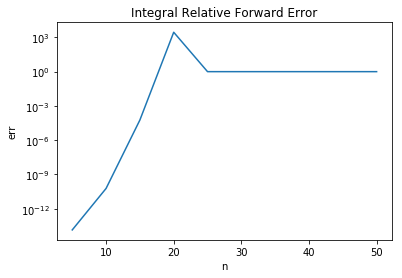

In [269]:
error()